In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def model_A(I, t, D_s,
                  L_l,
                  rho,
                  Y_ac,
                  b_ina,
                  b_det,
                  D_CO2,
                  D_H,
                  A_m,
                  F,
                  T,
                  R,
                  V_c,
                  V_a,
                  E_0_anode,
                  E_0_cathode,
                  i_0_ref,
                  b,
                  d_cell,
                  k_aq,
                  E_KA,
                  d_m,
                  k_m,
                  C_O2_max,
                  k_La,
                  q_O2,
                  r_max,
                  K_s):

    phi_a, L, C_Sb, C_S, C_CO2b, C_CO2, C_H, V_L, C_O2= I

    # def equ(i):
    #     eta_act = b * np.arcsinh(i / (2 * i_0_ref * C_S)) / 2.303
    #     eta_ohm = (d_m / k_m + d_cell / k_aq) * i
    #     i_l = 8 * F * D_s * C_Sb / L_l 
    #     eta_con = R * T * np.log(i_l / (i_l - i))

    #     E_anode = -E_0_anode - R * T * np.log((C_CO2 ** 3) * (C_H ** 12 )/ C_S) / (12 * F)
    #     E_cathode = E_0_cathode - R * T * np.log(1 / (C_O2 * (1e-7) ** 4) ) / (4 * F)
    #     return E_cathode - E_anode - eta_act - eta_con - eta_ohm - 100 * A_m * i

    # i = fsolve(equ, 60)[0]
    # i = np.random.random()
    # eta_act = b * np.arcsinh(i / (2 * i_0_ref * C_S)) / 2.303
    mu = r_max * C_S / (K_s + C_S)
    r_s = mu * phi_a# / (1 + np.exp(-F * eta_act / (R * T))) 
    delta = - b_det * L

    

    dL = Y_ac * r_s * L + delta
    dphi_a = Y_ac * r_s - b_ina * phi_a + phi_a * delta / L  - phi_a * dL / L
    dC_S = D_s * (C_Sb - C_S) / (L_l * L)- rho * r_s - C_S * dL / L
    dC_CO2 = D_CO2 * (C_CO2b - C_CO2) / (L_l * L) + 3 * rho * r_s - C_CO2 * dL / L
    dC_H = D_H * ((1e-7) - C_H) / (L_l * L) + 12 * rho * r_s - C_H * dL / L

    dV_L = -A_m * dL

    dC_Sb = -A_m * D_s * (C_Sb - C_S) / (L_l * V_L)# - 2 * C_Sb * dV_L
    dC_CO2b = -A_m * D_CO2 * (C_CO2b - C_CO2) / (L_l * V_L)# - 2 * C_CO2b * dV_L

    dC_O2 = (k_La) * (C_O2_max - C_O2) - (q_O2) * C_O2

    return np.array([dphi_a, dL, dC_Sb, dC_S, dC_CO2b, dC_CO2, dC_H, dV_L, dC_O2])

In [3]:
# def solve(model, I, t):
#     return odeint(model,I,t,args=(0.2554e-4/24,2e-4,50,0.22,0.02/24,0.05/24,0.9960e-4/24,2.3328e-4/24,54e-4,96450,303,8.314,135e-6,135e-6,340,1299,0.001,120,2.5e-2,3500,-155,4.5,1.7,7.26e-3,414/24,2.64/24,4.2,1.27e-3),)
# def solve2(model, I, t):
#     return odeint(model,I,t,args=(0.2554e-4/24,2e-4,50,0.32,0.02/24,0.05/24,0.9960e-4/24,2.3328e-4/24,54e-4,96450,303,8.314,135e-6,135e-6,340,1299,0.001,120,2.5e-2,3500,-155,4.5,1.7,7.26e-3,414/24,2.64/24,4.2,1.27e-3),)
def solve(model, I, t):
    return odeint(model,I,t,args=(0.2554e-4/24,2e-4,50,0.21/90,0.02/24,0.05/24,0.9960e-4/24,2.3328e-4/24,54e-4,96450,303,8.314,135e-6,135e-6,340,1299,0.001,120,2.5e-2,3500,-155,4.5,1.7,7.26e-3/32,414/24,2.64/24,0.046,0.00016),)
def solve2(model, I, t):
    return odeint(model,I,t,args=(0.2554e-4/24,2e-4,50,0.5/90,0.02/24,0.05/24,0.9960e-4/24,2.3328e-4/24,54e-4,96450,303,8.314,135e-6,135e-6,340,1299,0.001,120,2.5e-2,3500,-155,4.5,1.7,7.26e-3/32,414/24,2.64/24,0.046,0.00016),)

In [4]:
from icecream import ic

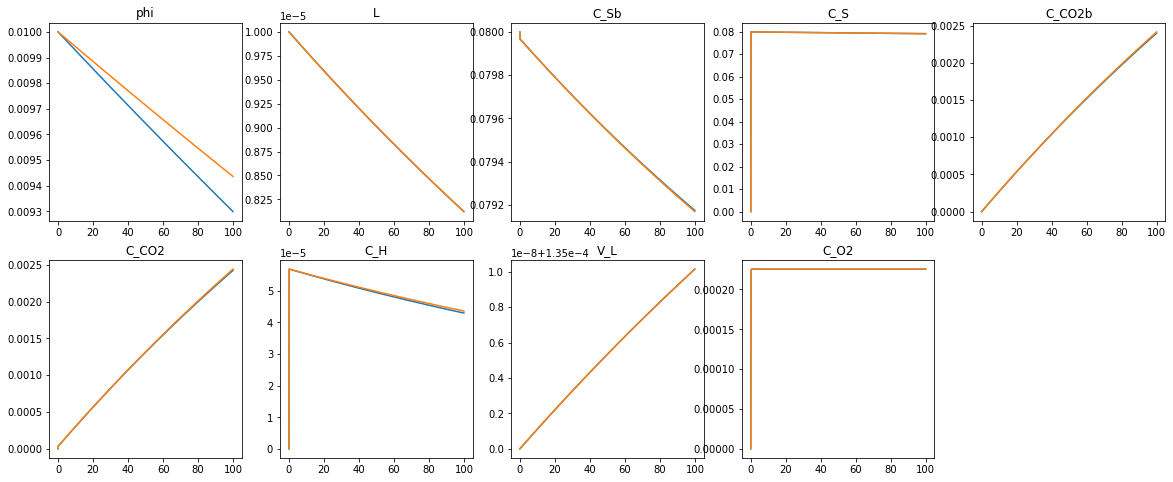

In [5]:
#I = (0.01,1e-5,0.083,0,0,0,1e-7,135e-6,0)
I = ( 0.01,1e-5, 0.08,0, 0, 0, 1e-7, 135e-6, 0)
t = np.arange(0,100,0.1)
res = solve(model_A, I, t)
res2 = solve2(model_A, I, t)
#plt.plot(t,res[:,5])
plt.figure(figsize=(20,8))
names = ['phi','L','C_Sb','C_S','C_CO2b','C_CO2','C_H','V_L','C_O2']
for n in range(1,10):
    plt.subplot(2,5,n)
    plt.plot(t,res[:,n-1])
    plt.plot(t,res2[:,n-1])
    plt.title(names[n-1])

# r_max = 8
# K_s = 0.014
# r_s = r_max * res[:,3] / (K_s + res[:,3]) * res[:,0]
# plt.subplot(2,5,10)
# plt.plot(t,r_s)
# plt.title('r_s')

In [734]:
C_S[-5:-1]

array([0.07960894, 0.07960004, 0.07959114, 0.07958224])

In [6]:

b = 120
i_0_ref = 0.2
C_S = res[:,3]
C_S2 = res2[:,3]
d_m = 4.5
k_m = 1.7
d_cell = 2.5e-2
k_aq = 3500
F = 96450
C_Sb = res[:,2]
C_Sb2 = res2[:,2]
L_l = 2e-4
R = 8.314
T = 303
E_0_anode = 0.340
C_CO2 = res[:,5]
C_H = res[:,6]
E_0_cathode = 1299
C_O2 = res[:,8]
C_CO22 = res2[:,5]
C_H2 = res2[:,6]
C_O22 = res2[:,8]
A_m = 54e-4
V_C = 680
R_ext = 100

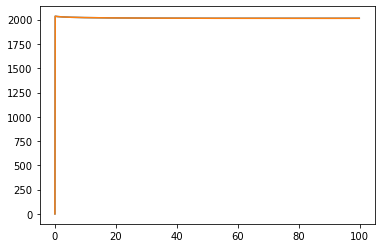

In [7]:
e_cell = []
e_cell2 = []
def get_voltage(c_S,c_CO2,c_H):

    if c_S == 0:
        return 0

    E_A = E_0_anode - R * T * np.log(((c_CO2) ** 3) * (c_H ** 12)/ (c_S)) / (12 * F)
    #print(R * T * np.log(((c_CO2 / 44) ** 3) * (c_H ** 12)/ (c_S / 90)) / (12 * F))
    #ic(E_A)
    R_int = d_m / k_m + d_cell / k_aq
    #print(R * T * np.log(((c_CO2) ** 3) * (c_H ** 12 )/ (c_S) / (12 * F)))
    E_A = 1000 * E_A
    #ic(E_A)
    def equation(E):
        return E-V_C-E_A-E/R_ext*R_int-b * np.arcsinh(E/(R_ext*A_m*2*i_0_ref*c_S)) / 2.303
    E = fsolve(equation,300)[0]
    return E
for n in range(np.shape(C_S)[0]):
    e_cell.append(get_voltage(C_S[n],C_CO2[n],C_H[n]))
    e_cell2.append(get_voltage(C_S2[n],C_CO22[n],C_H2[n]))
i_cell = np.array(e_cell)
i_cell2 = np.array(e_cell2)
plt.plot(t,e_cell)
plt.plot(t,e_cell2)

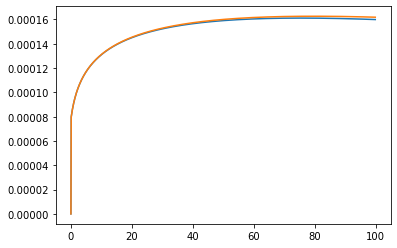

In [8]:
i_cell = []
i_cell2 = []
def get_current(c_S,c_CO2,c_H):

    if c_S == 0:
        return 0

    E_A = E_0_anode - R * T * np.log(((c_CO2) ** 3) * (c_H ** 12)/ (c_S)) / (12 * F)
    #print(R * T * np.log(((c_CO2 / 44) ** 3) * (c_H ** 12)/ (c_S / 90)) / (12 * F))
    #ic(E_A)
    R_int = d_m / k_m + d_cell / k_aq
    
    #print(R * T * np.log(((c_CO2) ** 3) * (c_H ** 12 )/ (c_S) / (12 * F)))
    E_A = 1000 * E_A
    #ic(E_A)
    def equation(i):
        return 2 * i_0_ref * c_S * np.sinh(2.303 * (V_C - i * A_m * (R_int + R_ext) - E_A) / b) - i
    i = fsolve(equation,1000)[0]
    return i*A_m
for n in range(np.shape(C_S)[0]):
    i_cell.append(get_current(C_S[n],C_CO2[n],C_H[n]))
    i_cell2.append(get_current(C_S2[n],C_CO22[n],C_H2[n]))
i_cell = np.array(i_cell)
i_cell2 = np.array(i_cell2)
plt.plot(t,i_cell)
plt.plot(t,i_cell2)

<ipython-input-9-90084ec3f9ab>:1: RuntimeWarning: invalid value encountered in divide
  E_A = E_0_anode - R * T * np.log(((C_CO2) ** 3) * (C_H ** 12 )/ (C_S)) / (12 * F)
<ipython-input-9-90084ec3f9ab>:3: RuntimeWarning: invalid value encountered in divide
  E = V_C - E_A - i_cell * (d_m / k_m + d_cell / k_aq) - b * np.arcsinh(i_cell / (2*i_0_ref*C_S)) / 2.303
<ipython-input-9-90084ec3f9ab>:4: RuntimeWarning: invalid value encountered in divide
  eta = b * np.arcsinh(i_cell / (A_m*2*i_0_ref*C_S)) / 2.303
<ipython-input-9-90084ec3f9ab>:5: RuntimeWarning: invalid value encountered in divide
  E_A2 = E_0_anode - R * T * np.log(((C_CO22) ** 3) * (C_H2 ** 12 )/ (C_S2)) / (12 * F)
<ipython-input-9-90084ec3f9ab>:7: RuntimeWarning: invalid value encountered in divide
  E2 = V_C - E_A2 - i_cell2 * (d_m / k_m + d_cell / k_aq) - b * np.arcsinh(i_cell2 / (2*i_0_ref*C_S2)) / 2.303
<ipython-input-9-90084ec3f9ab>:8: RuntimeWarning: invalid value encountered in divide
  eta2 = b * np.arcsinh(i_cell2 / 

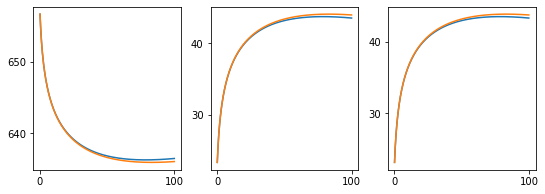

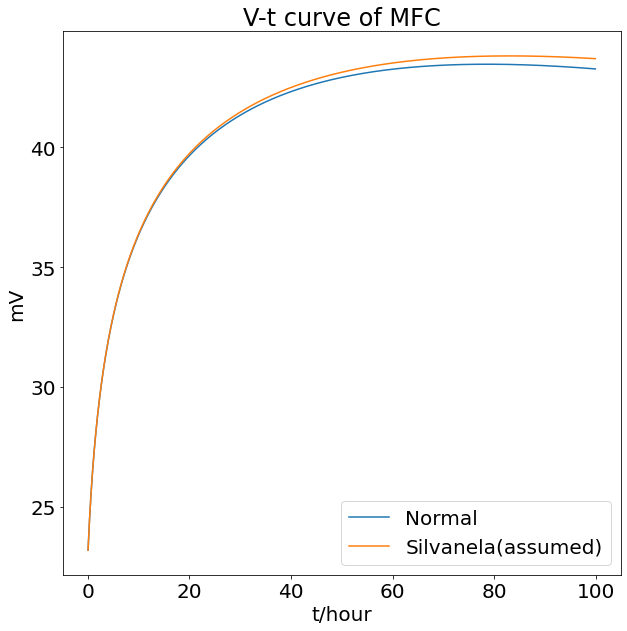

In [9]:
E_A = E_0_anode - R * T * np.log(((C_CO2) ** 3) * (C_H ** 12 )/ (C_S)) / (12 * F)
E_A *= 1000
E = V_C - E_A - i_cell * (d_m / k_m + d_cell / k_aq) - b * np.arcsinh(i_cell / (2*i_0_ref*C_S)) / 2.303
eta = b * np.arcsinh(i_cell / (A_m*2*i_0_ref*C_S)) / 2.303
E_A2 = E_0_anode - R * T * np.log(((C_CO22) ** 3) * (C_H2 ** 12 )/ (C_S2)) / (12 * F)
E_A2 *= 1000
E2 = V_C - E_A2 - i_cell2 * (d_m / k_m + d_cell / k_aq) - b * np.arcsinh(i_cell2 / (2*i_0_ref*C_S2)) / 2.303
eta2 = b * np.arcsinh(i_cell2 / (A_m*2*i_0_ref*C_S2)) / 2.303
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.plot(t,E_A)
plt.plot(t,E_A2)
plt.subplot(132)
plt.plot(t,eta)
plt.plot(t,eta2)
plt.subplot(133)
plt.plot(t,E)
plt.plot(t,E2)

plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 20})
plt.title('V-t curve of MFC')
plt.plot(t,E,label = 'Normal')
plt.plot(t,E2,label = 'Silvanela(assumed)')
plt.ylabel('mV')
plt.xlabel('t/hour')
plt.legend()

<ipython-input-10-c4d742db9dec>:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(t,V_C-E_A-i_0_ref*A_m*(d_m / k_m + d_cell / k_aq)-b * np.arcsinh(1 / (2*C_S)) / 2.303)


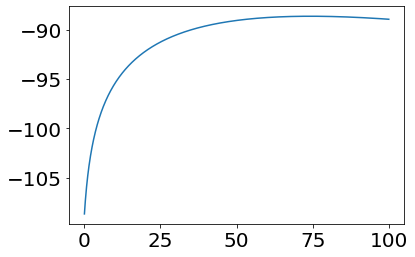

In [10]:
plt.plot(t,V_C-E_A-i_0_ref*A_m*(d_m / k_m + d_cell / k_aq)-b * np.arcsinh(1 / (2*C_S)) / 2.303)